# Homework 5

This is an individual assignment.

**Due: Wednesday, April 1 @ 11:59 PM**

## Grading Rubric

1. **Problem 1 (30 pts):** you've answered all 3 questions (10 points each).

2. **Problem 2 (30 pts):** you've answered this question and showed your work. 

3. **Problem 3 (40 pts):** you've answered all questions and provided the appropriate discussion comments.

**Total: 100 pts**

# Multi-Layer Perceptrons and Backpropagation

In this assignment, you will test your knowledge about all Multi-Layer Perceptrons (MLPs) and the backpropagation algorithm.

**You are allowed to use ```scikit-learn``` modules.**

**Objectives**

By completing this assignment you will practice and master the following skills:

* Multi-Layer Perceptron
* Backpropagation
* Online vs Batch Learning

**Create your Repo**

You can create the repo for this assignment by visiting the following link: https://classroom.github.com/a/E4a_1GaX

# Problem 1 - Decision Boundaries in MLP Layers

Suppose you want to create this mask with a two-hidden layer MLP with sigmoid units (threshold non-linearity). Assume that black pixels are 0 and white pixels are 1 (2 class problem).

<div><img src="mask.png", width="300"><!div>

Answer the following questions:

1. What is the smallest number of hidden units/neurons you will need in each layer?

2. Explain their role in creating the mask.

3. Can you achieve the same goal with a *single hidden layer network*? Why or why not?

1. In the first hidden layer, there should be 6 neurons. In the second layer, there should be 4 neurons. Note that this assumes the white border is just a background; only the 5 white shapes are considered since the mask is the black square with white pixel groups inside. 

2. The first hidden represents 6 linearly discriminatory boundaries that grant each discrete group of white pixels its own local area. The second hidden layer combines together the previous 6 linear boundaries into 4 non-linear, more complex boundaries. 

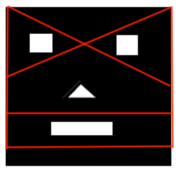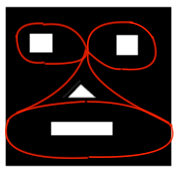

3. According to the Universal Approximator Theorem, yes. The theorem states that a MLP with only 1 single hidden layer can approximate any real continuous function with any dimensionality (1D or higher) for the input. Although the original function representing the mask is discrete (range of function is either 0 or 1), the sigmoid activation function is being used and allows outputs to be real decimal numbers between 0 and 1. At the border between black pixels and a white pixel group, the transition is a steep climb or fall without being an abrupt change from 0 to 1 or 1 to 0. This makes the function f(x, y) differentiable and thus continuous, as the sigmoid function itself is already known to be differentiable. Here, x and y are the first and second coordinates of the location of each pixel. 

# Problem 2 - Backpropagation

Consider the following network: 1 input layer, 1 hidden layer and 1 output layer, each layer with 2 neurons.

<div><img src="network.png", width="700"><!div>
    
All weights are initialized to the values shown (and there are no biases for simplicity). Consider the data point $x=[1,1]^T$ with desired output vector $d=[1,0]^T$. Complete one iteration of backpropagation by hand assuming a learning rate of $\eta=0.1$. 

What would all the weight values be after one backpropagation iteration? Show your work. 

Use the sigmoid activation function: $\phi(x) = \frac{1}{1 + e^{-x}}$. Note that $\frac{d\phi(x)}{dx}=\phi'(x) = \phi(x)(1-\phi(x))$.

# Problem 3 - Batch vs Online Learning

In this problem, you will be working with the [Optical recognition of handwritten digits dataset](https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits).

The Digits data set contains $8\times 8$ images of digits (class labels 0, 1, 2, 3, 4, 5, 6, 7, 8 and 9). This data set has 60,000 images for training and 10,000 images for testing. Each image is a 8-bit grayscale image and so the intensity values per pixel range from 0-255.

The following code cell loads the Digits data set.

In this problem you will be comparing the performance between (1) online and batch learning and (2) using different optimization algorithms (stochastic gradient descent or SGD, SGD with momentum, ADAM, etc.).

The ```MLPClassifier``` parameters you will need to consider for this question are:

* ```hidden_layer_sizes```, ```solver```, ```alpha```, ```batch_size```, ```learning_rate```, ```learning_rate_init```, ```momentum```, ```nesterovs_momentum``` and ```random_state```.

Answer the following questions:

1. **Online vs Batch learning** 

Create a fixed network architecture (for example, single hidden layer with 10 neurons), with a fixed learning rate (e.g. 0.001), consider 0 momentum and no Nesterov's momentum. I recommend you to fix the ```random_state``` to some seed so you can compare the results between runs.

Using this setup, experiment with different batch sizes (batch = 1 is the same as doing online learning). Plot the learning curves for all models (single plot) and evaluate the accuracy results in test set for all cases. Provide a discussion about differences and advantages of online vs batch learning.

(To plot learning curves, there's a method associated with ```sklearn``` functions called ```loss_curve_```. There is also another function called ```learning_curve``` from the ```model_selection``` module.)

2. **Optimization Algorithms**

Create a similar setup as in the previous step where now you will experiment with different learning algorithms, in particular: SGD with momentum, SGD with Nesterov's momentum and ADAM.

Include learning curves for all models (single plot) and comment on the results. Which one worked better? Using what we learned in class, does the result match your expectation?

3. **Comparison of Test Performance**

Compare the test set performance for all learning strategies you have experimented with. Provide an overall discussion that addresses your earlier comments on parts 2 and 3 and relate them to how successful each strategy is generalization for test set.

Provide any additional insightful comments on any particular of the network that would result in a significant impact in the test performance.

In [43]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.datasets import load_digits

In [44]:
X, y = load_digits(return_X_y = True)

print(X.shape) 
print(type(X))
print(y.shape)
print(type(y))
print(np.unique(y))

(1797, 64)
<class 'numpy.ndarray'>
(1797,)
<class 'numpy.ndarray'>
[0 1 2 3 4 5 6 7 8 9]


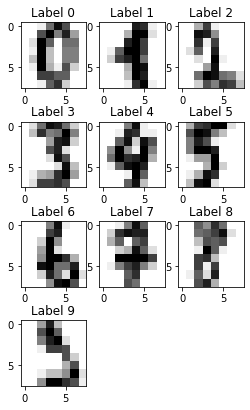

In [45]:
fig = plt.figure(figsize=(4,7))
for i in range(10):
    ax = fig.add_subplot(4,3,i+1)
    ax.imshow(X[np.where(y==i)[0][1],:].reshape((8,8)), cmap='binary')
    plt.title('Label '+str(i))

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't co

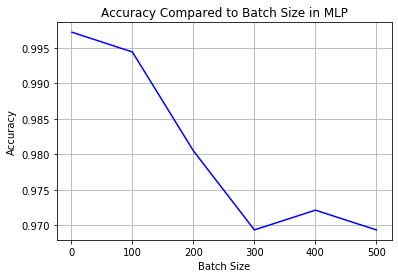

In [56]:
import matplotlib.pyplot as plt 
import numpy as np 
import seaborn as sns
from sklearn.neural_network import MLPClassifier 
from sklearn.model_selection import learning_curve
%matplotlib inline 

scores=[]
batch_size_list=[1, 100, 200, 300, 400, 500]
for batch_size in batch_size_list: 
    mlp=MLPClassifier(hidden_layer_sizes=10, batch_size=batch_size, activation='logistic', learning_rate_init=0.001, random_state=0)
    mlp.fit(X=X, y=y)
    scores.append(mlp.score(X=X_train, y=y_train))

sns.lineplot(x=batch_size_list, y=scores, color='blue')
plt.grid(b=True, which='major', axis='both')
plt.title(label='Accuracy Compared to Batch Size in MLP')
plt.xlabel(xlabel='Batch Size')
plt.ylabel(ylabel='Accuracy')
plt.show()

In essence, online learning updates the weights in a MLP after each input value, while batch learning updates weights only after a whole batch has gone through the neural network. If the total amount of input data is too big, then batch learning is not feasible in terms of time consumption. Online learning offers tuning on the go. Since online learning is the most frequent method of updating weights, accuracy tends to be higher than batch learning. Technically, the term 'batch learning' refers to accumulating the preferred changes to the weights over the whole dataset first. What was done in the previous cell is known as mini-batch learning, where the input data is broken into roughly equal-sized subsets first. As the batch size becomes smaller, weights change more frequently and accuracy goes up. 

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't co

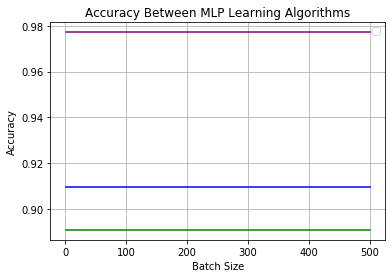

In [59]:
import matplotlib.pyplot as plt 
import numpy as np 
from sklearn.neural_network import MLPClassifier 
from sklearn.model_selection import learning_curve
%matplotlib inline 

mlp_sgd_m=MLPClassifier(
    hidden_layer_sizes=10, 
    solver='sgd', 
    activation='logistic', 
    learning_rate_init=0.001, 
    random_state=0, 
    momentum=1.0, 
    nesterovs_momentum=False
)

mlp_sgd_nm=MLPClassifier(
    hidden_layer_sizes=10, 
    solver='sgd', 
    activation='logistic', 
    learning_rate_init=0.001, 
    random_state=0, 
    momentum=1.0, 
    nesterovs_momentum=True
)

mlp_adam=MLPClassifier(
    hidden_layer_sizes=10, 
    solver='adam', 
    activation='logistic', 
    learning_rate_init=0.001, 
    random_state=0, 
    momentum=0,
    nesterovs_momentum=False
)

sgd_m_scores=[]
sgd_mn_scores=[]
adam_scores=[]
batch_size_list=[1, 100, 200, 300, 400, 500]
for batch_size in batch_size_list: 
    mlp_sgd_m.fit(X=X, y=y)
    sgd_m_scores.append(mlp_sgd_m.score(X=X, y=y))
    mlp_sgd_nm.fit(X=X, y=y)
    sgd_mn_scores.append(mlp_sgd_nm.score(X=X, y=y))
    mlp_adam.fit(X=X, y=y) 
    adam_scores.append(mlp_adam.score(X=X, y=y))

sns.lineplot(x=batch_size_list, y=sgd_m_scores, color='blue')
sns.lineplot(x=batch_size_list, y=sgd_mn_scores, color='green')
sns.lineplot(x=batch_size_list, y=adam_scores, color='purple')
plt.legend(['SGD w/ Momentum', 'SGD w/ Nesterov Momentum', 'ADAM'], 'lower right')
plt.grid(b=True, which='major', axis='both')
plt.title(label='Accuracy Between MLP Learning Algorithms')
plt.xlabel(xlabel='Batch Size')
plt.ylabel(ylabel='Accuracy')
plt.show()

All 3 learning algorithms performed pretty well in terms of accuracy. However, ADAM performed the best. While SGD computes stochastic estimates of the gradient, ADAM is an upgrade by combining RMSProp and features of SGD. By using squared gradients and taking benefit of momentum too, ADAM is a preferred learning method for deep learning. 

## Submit your Solution

Along with your Jupyter Notebook answers, create a PDF of the notebook with your solutions.

As always, `add` and `commit` the final version of your work, and `push` your code to your GitHub repository.

* Submit the **URL** of your GitHub Repository as your assignment submission on Canvas.